# 1. Introduction

Credit risk management plays a key role in the financial sector, helping institutions assess the likelihood of potential customers defaulting. In a context where data analysis plays an increasingly important role, the application of machine learning algorithms becomes a great tool for predicting borrower behavior.

In this capstone project, I will explore the “German Credit Risk - With Target” dataset, available on “Kaggle” which provides information about German bank customers, including characteristics such as age, income, credit history and loan default status. previous ones. The main objective is to develop and run a machine learning model capable of predicting whether a customer will default on a future loan, based on their individual characteristics.

The adopted methodology follows a project management approach, prioritizing steps such as exploratory data analysis, data pre-processing, implementation of machine learning algorithms and effective presentation of findings.
At the end of this project, I hope to not only develop a robust predictive model, but also provide insights that can contribute to more accurate and effective analysis of credit risk, benefiting both financial institutions and potential customers.


# Importing Libraries 

In [331]:
pip install plotly


In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py 
py.init_notebook_mode(connected=True)                  
import plotly.graph_objs as go                         
import plotly.tools as tls                            
from collections import Counter                        
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV                                         # to split the data
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score     # to evaluate our model

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


import warnings

from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)


# 2. EDA (Exploratory of Data Analysis)

Data Exploration:
Data exploration is performed to better understand data characteristics and identify patterns or trends. This may include creating graphs, histograms, and correlation matrices.



In [333]:
dataframe = pd.read_csv("german_credit_data.csv")
df = pd.read_csv("german_credit_data.csv")

In [334]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [335]:
df.shape

(1000, 11)

Checking for missing or null values and datatype

In [336]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [337]:
# Replace null values in the 'Saving accounts' and 'Checking account' columns with the 'unknown' category
df['Saving accounts'].fillna('unknown', inplace=True)
df['Checking account'].fillna('unknown', inplace=True)


I will treat null values in the 'Saving accounts' and 'Checking account' columns, replacing them with the 'unknown' category, allowing me to keep the records in the dataset and avoid losing information.

In [338]:
df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [340]:
print(df.columns)

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


Viewing target variable

In [341]:

print(df['Risk'].value_counts())


Risk
good    700
bad     300
Name: count, dtype: int64


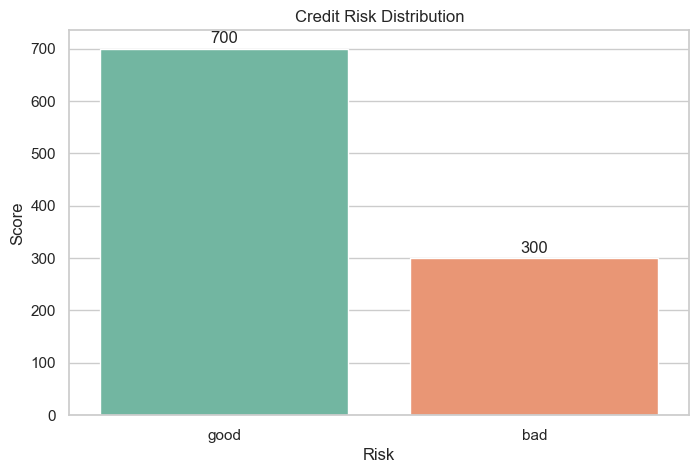

In [342]:
labels = ['good', 'bad']
values = [700, 300]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=values, palette='Set2')
plt.title('Credit Risk Distribution')
plt.xlabel('Risk')
plt.ylabel('Score')

for i in range(len(labels)):
    plt.text(i, values[i] + 10, f'{values[i]}', ha='center')

plt.show()

In [343]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


# 2.2. Exploratory analysis of variables

Calculating Descriptive Statistics of numerical variables

In [344]:
print(df.describe())

        Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000


Age: The average age of customers is approximately 35.55 years old, with a standard deviation of approximately 11.38 years old.
Ages range from 19 to 75 years old, with the majority of clients (50%) being 33 years old or younger.
The age distribution appears to be reasonably symmetrical, with a small standard deviation, which indicates that the age of customers does not vary much from the average.

Occupation (Job): The mean of the occupation variable is approximately 1.90, which suggests that the majority of customers have an occupation classified as 2 (the specific meaning of each category is unclear in this context).
The occupancy variable varies between 0 and 3, with the majority of customers (50%) having an occupancy of 2.

Credit amount: The average amount of credit requested by customers is approximately 3271.26 monetary units, with a considerable standard deviation of approximately 2822.74.
Credit amounts vary between 250 and 18424 currency units, with the majority of customers (50%) requesting a credit amount equal to or less than 2319.50 currency units.
The distribution of credit value appears to be quite varied, with a high standard deviation, indicating a large dispersion of values in relation to the average.

Duration: The average loan duration is approximately 20.90 months, with a standard deviation of approximately 12.06 months.
Duration varies between 4 and 72 months, with the majority of loans (50%) having a duration of 18 months or less.
The distribution of loan duration also appears to be quite varied, with a relatively high standard deviation from the mean.

Number of Numerical Variables:  5


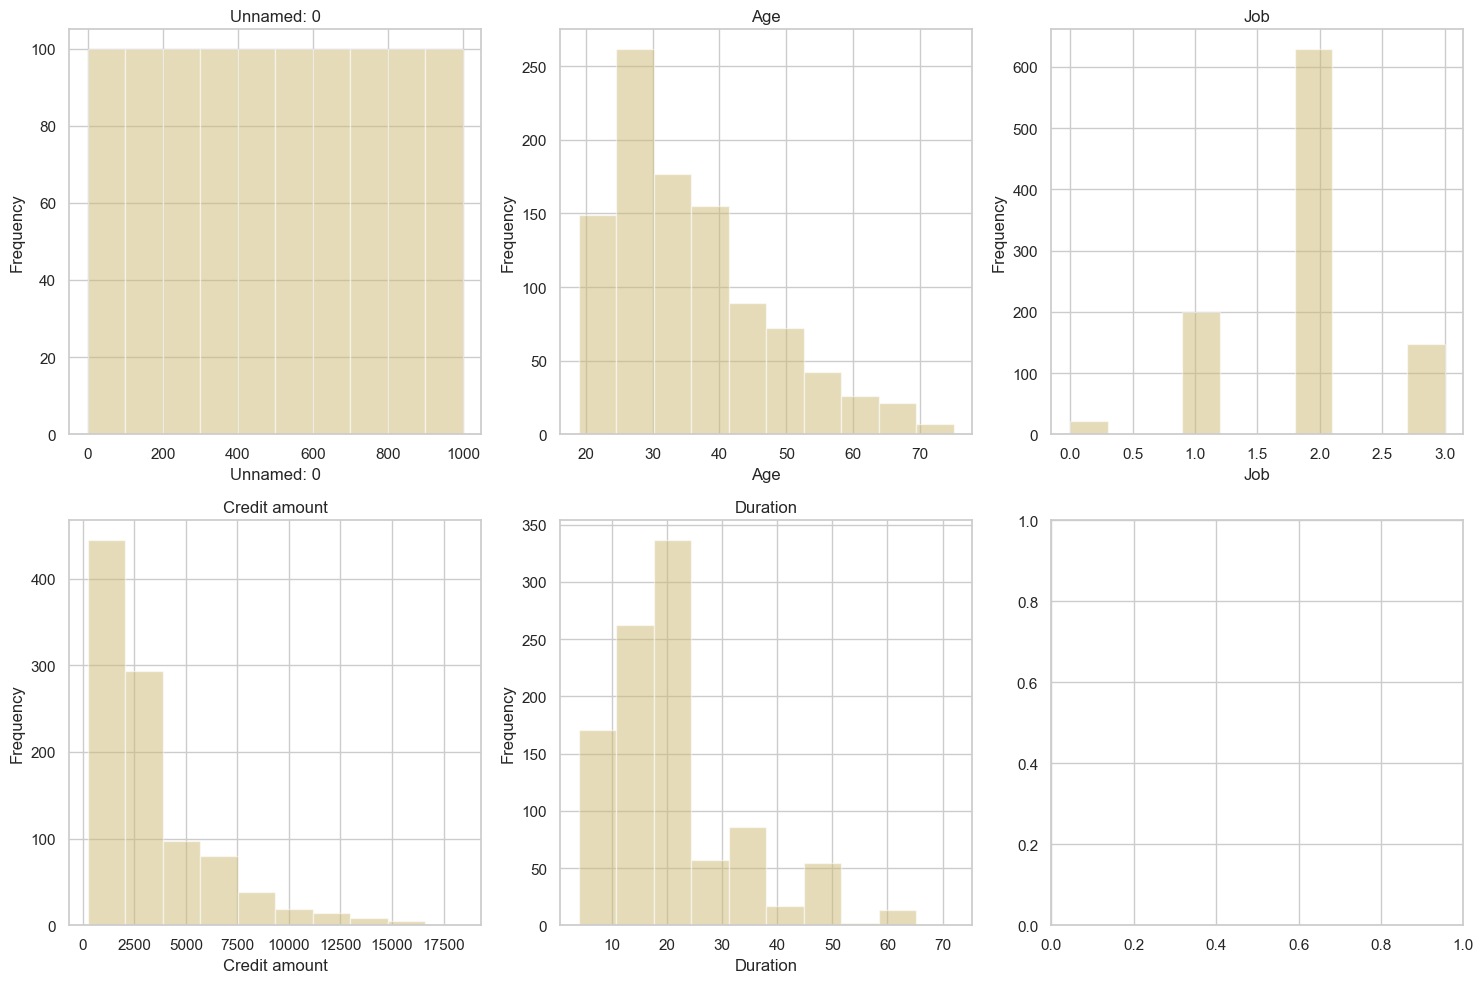

In [346]:
import matplotlib.pyplot as plt

# Select numerical columns, excluding 'Id'
num_cols = [col for col in df.columns if df[col].dtype != 'object' and col != "Id"]
print('Number of Numerical Variables: ', len(num_cols))

def hist_for_nums(df, numeric_cols):
    num_plots = len(numeric_cols)
    num_cols_per_row = 3  # Number of columns per row
    num_rows = num_plots // num_cols_per_row + (num_plots % num_cols_per_row > 0)  # Calculate the number of rows needed
    fig, axs = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5*num_rows))  # Create a figure with the appropriate number of subplots
    
    for i, col in enumerate(numeric_cols):
        row = i // num_cols_per_row
        col_idx = i % num_cols_per_row
        df[numeric_cols[i]].plot.hist(alpha=0.5, color='y', ax=axs[row, col_idx])  # Access the subplot correctly
        axs[row, col_idx].set_xlabel(numeric_cols[i])  # Use column name as label
        axs[row, col_idx].set_title(numeric_cols[i])  # Use column name as title

    plt.tight_layout()  # Adjust layout to avoid overlapping graphics
    plt.show()

hist_for_nums(df, num_cols)



Viewing distribution by age

In [347]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

df_good = df.loc[df["Risk"] == 'good']['Age'].values.tolist()
df_bad = df.loc[df["Risk"] == 'bad']['Age'].values.tolist()
df_age = df['Age'].values.tolist()

# First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)

# Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)

# Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

# Creating the grid
fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                    subplot_titles=('Good','Bad', 'General Distribuition'))
#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\marlu\AppData\Local\Temp\ipykernel_19160\3003465868.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\marlu\AppData\Local\Temp\ipykernel_19160\3003465868.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




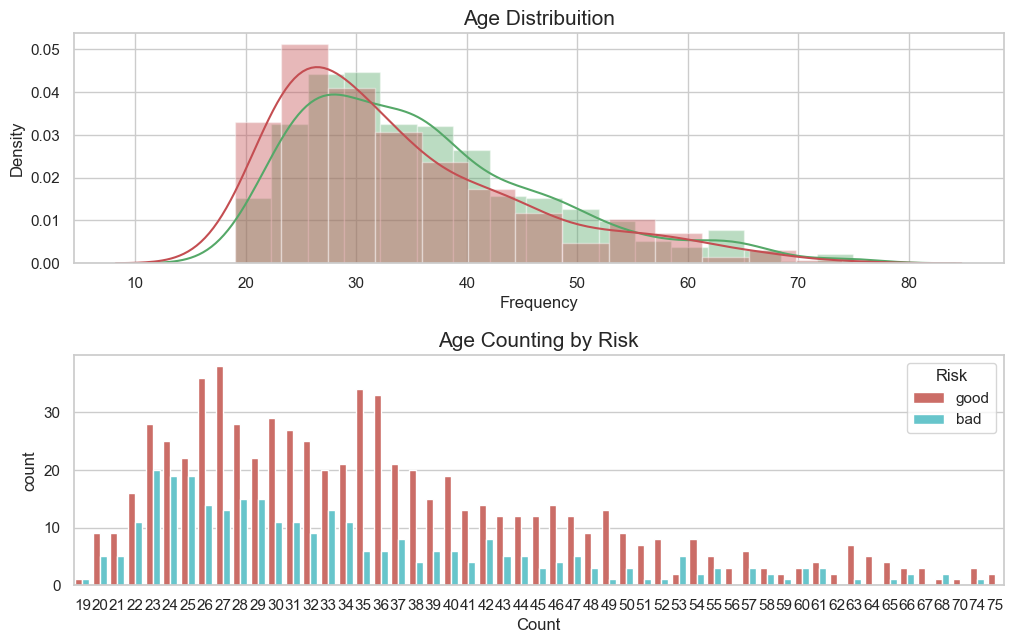

In [348]:
df_good = df[df["Risk"] == 'good']
df_bad = df[df["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

Age Distribution by Risk Chart:

In the first graph, we observe the overlapping of age distributions for customers considered "good" (green) and "bad" (red).
We can notice that the age distribution for "good" customers appears to be wider and tends to be more uniform compared to the age distribution for "bad" customers.
However, there is considerable overlap between the two distributions, which indicates that age alone may not be a determining factor in predicting credit risk. Other factors may be influencing the risk classification.

Age Count by Risk Chart:

In the second graph, we observe the count of customers in different age groups divided by credit risk.
We can observe that the most represented age groups for both the "good" and "bad" groups are between approximately 20 and 40 years old.
However, the proportion of "bad" customers appears to be higher in younger age groups, while the proportion of "good" customers increases in older age groups.
This suggests that younger customers may be more likely to be classified as "bad", while older customers are more likely to be classified as "good".

<Figure size 1000x600 with 0 Axes>

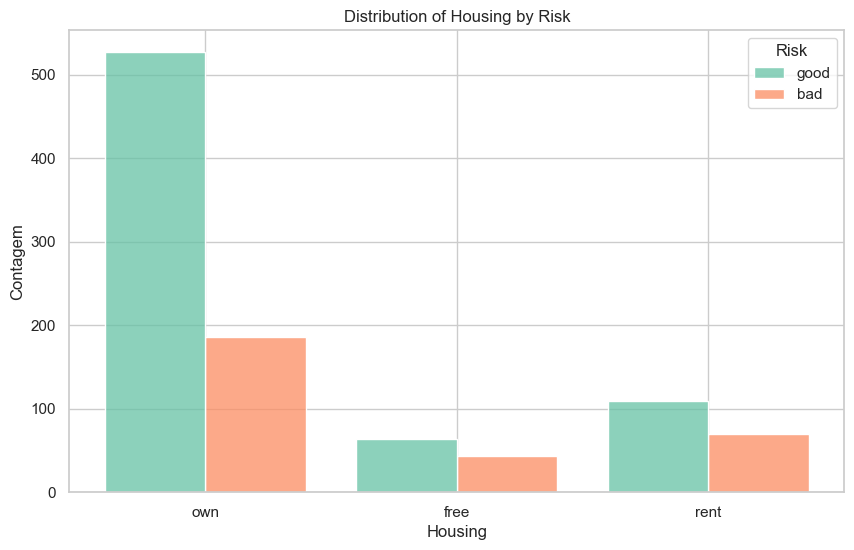

In [349]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Housing', hue='Risk', multiple='dodge', shrink=0.8, palette='Set2')
plt.title('Distribution of Housing by Risk')
plt.xlabel('Housing')
plt.ylabel('Contagem')
plt.show()


Looking at the graph it can be seen that there is a significantly greater number of individuals with a good risk ("good") compared to a bad risk ("bad"). This suggests that owning a home may be associated with better credit risk, i.e., individuals who own their homes generally have greater financial stability, which may be an indicator of better credit risk.

Those who rent ("rent") may have different levels of financial stability. Rent does not necessarily indicate high credit risk, but may reflect a variable income range or personal preferences. The more balanced distribution may suggest that rent is not a strong indicator of credit risk on its own.

Individuals who live for free ("free") may have different situations, such as living with family. This category may have fewer people, but analyzing the distribution of risks within this category can reveal whether free housing is associated with some form of financial support or dependency, influencing credit risk.



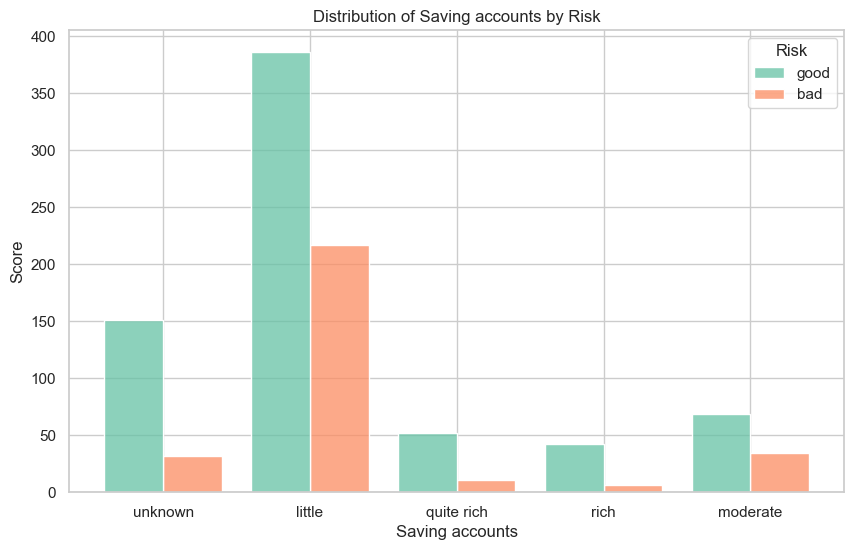

In [350]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Saving accounts', hue='Risk', multiple='dodge', shrink=0.8, palette='Set2')
plt.title('Distribution of Saving accounts by Risk')
plt.xlabel('Saving accounts')
plt.ylabel('Score')
plt.show()


"Little" category: This category can have a significant number of individuals with both "good" and "bad" risk.
The presence of many people with a small amount in savings may indicate greater financial vulnerability, which may be associated with greater credit risk.

"Moderate" category: The distribution may show a balance or a slight tilt towards one of the risk levels.
Individuals with moderate savings may have better financial capacity compared to those with little savings, but they may still be in an intermediate risky position.

"Quite rich" and "rich" categories: These categories may have more individuals with "good" risk. Having a significant amount in savings generally indicates greater financial security and a better ability to pay debts, associated with lower credit risk.

Viewing Credit Amount Distribution by Risk Level

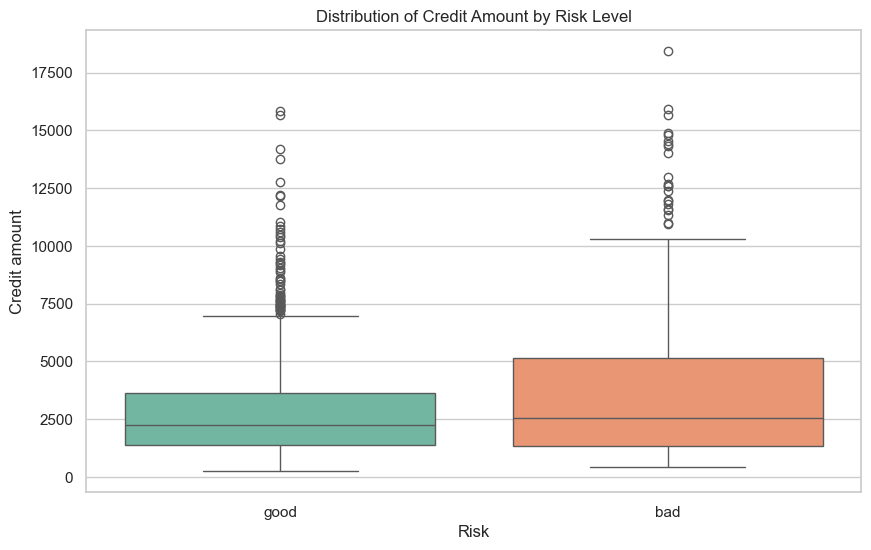

In [351]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Risk', y='Credit amount', palette='Set2')
plt.title('Distribution of Credit Amount by Risk Level')
plt.xlabel('Risk')
plt.ylabel('Credit amount')
plt.show()


In [386]:
import plotly.graph_objects as go

# Separate data for each risk level
good_credit = df[df['Risk'] == 'good']['Credit amount']
bad_credit = df[df['Risk'] == 'bad']['Credit amount']

# Create density traces for each risk level
trace1 = go.Violin(
    y=good_credit,
    box_visible=True,
    line_color='blue',
    meanline_visible=True,
    name='Good Credit',
    points='all',
    jitter=0.05
)

trace2 = go.Violin(
    y=bad_credit,
    box_visible=True,
    line_color='red',
    meanline_visible=True,
    name='Bad Credit',
    points='all',
    jitter=0.05
)

# Create layout for the chart
layout = go.Layout(
    title='Distribution of Credit Amount by Risk Level',
    yaxis=dict(title='Credit amount'),
    violingap=0.5
)

# Create figure
fig = go.Figure(data=[trace1, trace2], layout=layout)


fig.show()


The graphs indicate how credit values are distributed between the "good" and "bad" risk groups.

Distribution of Credit Values: The violin plot shows a greater density at lower credit values for "bad" risk, this may suggest that customers with lower credits are more likely to be classified as "bad".
The boxplot may show that the median credit rating for "good" risk is higher, suggesting that customers with higher credits are more likely to be classified as "good".

Variability and Outliers: The presence of many outliers in the "bad" risk group in the boxplot may indicate greater variability in the amounts of credit granted to higher risk customers. The violin plot may complement this by showing a wider and less concentrated distribution for "bad" " risk.

Visualizando Distribution of Loan Duration by Credit Risk

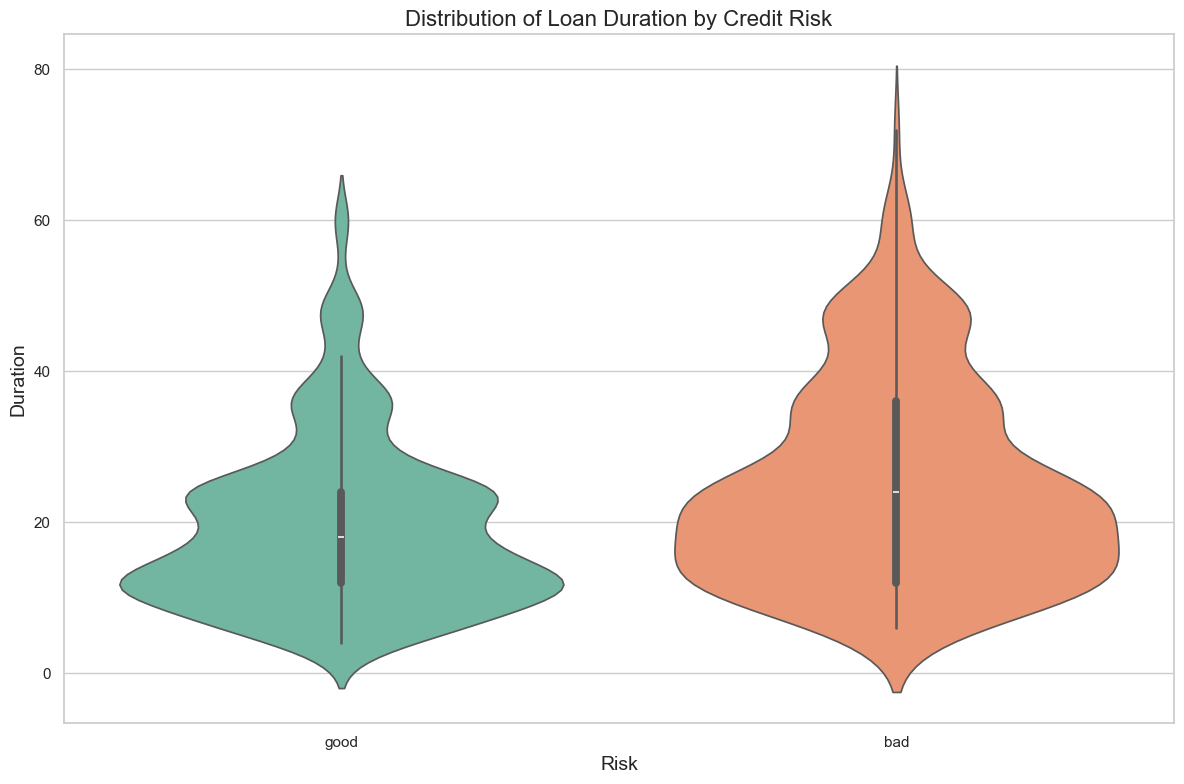

In [354]:
df = df.drop(columns=["Unnamed: 0"])


plt.figure(figsize=(12, 8))


sns.violinplot(data=df, x='Risk', y='Duration', palette='Set2')

# Adjust axis title and labels
plt.title('Distribution of Loan Duration by Credit Risk', fontsize=16)
plt.xlabel('Risk', fontsize=14)
plt.ylabel('Duration', fontsize=14)


plt.tight_layout()
plt.show()


Observing the graph, it can be seen that the distribution for "bad" is broader and presents greater density in longer durations. This suggests that loans with longer durations are more likely to be classified as "bad".

Viewing Comparison of Sex and Risk

In [357]:
import pandas as pd
import plotly.express as px

# Create a mosaic chart to compare 'Sex' and 'Risk'
fig = px.sunburst(df, path=['Sex', 'Risk'], title="Risk Distribution by Sex")

# Configure the layout to improve visualization
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

fig.show()


Viewing Comparison of Sex and Purpose

In [358]:

# Creating a mosaic chart to compare 'Sex' and 'Purpose'
fig = px.sunburst(df, path=['Sex', 'Purpose'], title="Comparison of Sex and Purpose")

# Configuring the layout to improve visualization
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


We can observe that males tend to request loans more frequently compared to females. However, when we analyze the average of the groups of men and women, we find that there is a balanced distribution between both sexes with regard to the purposes of loans. This indicates that although men ask for more loans in terms of quantity, the reasons why men and women apply for credit are similar in proportion. In other words, the reasons for applying for loans do not differ significantly between genders.

# 3. Data Preparation and Feature Engineering

The data preparation step plays a key role in the data analysis and modeling process. It consists of a series of procedures designed to ensure that data is clean, organized and ready for analysis. This summary highlights the main activities carried out during the data preparation stage.

1. Data Cleaning:
Data cleaning involves identifying and handling missing values, inconsistencies, and errors in the data. This includes techniques such as filling in missing values, removing outliers, and correcting typos.

2. Data Transformation:
Data transformation is performed to convert data into a format more suitable for analysis. This may include converting data types, normalizing numeric variables, and encoding categorical variables.

3. Feature Selection:
Feature selection aims to identify and select the most relevant features for analysis or modeling. This may involve creating new variables, removing redundant or irrelevant variables, and scaling resources.

4. Treatment of Unbalanced Data:
If there is imbalance between classes in classification problems, specific techniques can be applied to deal with this, such as oversampling, undersampling or the use of specific algorithms for imbalanced data.

In summary, the data preparation step is essential to ensure the quality and suitability of data for analysis and modeling.


# 3.1. Missing Values Analysis

In [221]:
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na


missing_values_table(df)

                  n_miss  ratio
Checking account     394   39.4
Saving accounts      183   18.3


['Saving accounts', 'Checking account']

Filling missing values with mode

In [222]:
df["Saving accounts"].fillna(df['Saving accounts'].mode()[0], inplace=True)
df["Checking account"].fillna(df['Checking account'].mode()[0], inplace=True)

These commands were used to identify and quantify missing values in the dataset and fill in missing values in the "Saving accounts" and "Checking account" columns with the most frequent value (mode) in each of these columns.

In [359]:
# Defining the limits of age groups
limites_idade = [0, 30, 60, float('inf')]  # As faixas são: 0-30, 31-60, acima de 60

# Defining labels for age groups
rotulos_idade = ['young', 'adult', 'senior']

# Creating a new column based on age limits
df['Age_cat'] = pd.cut(df['Age'], bins=limites_idade, labels=rotulos_idade, right=False)

# Displaying the first rows of the DataFrame with the new column
df.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,2,own,unknown,little,1169,6,radio/TV,good,senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,young
2,49,male,1,own,little,unknown,2096,12,education,good,adult
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,adult
4,53,male,2,free,little,little,4870,24,car,bad,adult


# 3.2. Outliers Analysis

Identifying Outliers

Setting limits (lower and upper limits) for outliers and using them for outliers

In [360]:
# Function to detect outliers
def detect_outliers(df):
    outliers = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Check if the column is numeric
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outliers[col] = outlier_indices
    return outliers

# Detect outliers
outliers_dict = detect_outliers(df)

# Print columns with outliers and their respective row indices
for col, indices in outliers_dict.items():
    if len(indices) > 0:
        print(f'Column "{col}" has {len(indices)} outliers')


Column "Age" has 23 outliers
Column "Job" has 370 outliers
Column "Credit amount" has 72 outliers
Column "Duration" has 70 outliers


In [361]:
# Function to replace outliers with limits
def replace_outliers_with_limits(df):
    new_df = df.copy()  # To avoid changing the original DataFrame
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Check if the column is numeric
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Replace outlier values with limits
            new_df[col] = new_df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return new_df

# Apply the function to replace outliers
new_df = replace_outliers_with_limits(df)



This code iterated over each column of the DataFrame calculating the lower and upper limits using the interquartile range (IQR).
It replaced the outliers (outside these limits) with the limits, then returned a new DataFrame with the outliers replaced by the limits. After running this code, the new_df DataFrame contains the outliers replaced by the calculated limits.

In [362]:
new_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,64.5,male,2.0,own,unknown,little,1169.0,6.0,radio/TV,good,senior
1,22.0,female,2.0,own,little,moderate,5951.0,42.0,radio/TV,bad,young
2,49.0,male,2.0,own,little,unknown,2096.0,12.0,education,good,adult
3,45.0,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good,adult
4,53.0,male,2.0,free,little,little,4870.0,24.0,car,bad,adult


In [363]:
df.shape

(1000, 11)

In [364]:
print(new_df.describe())

               Age     Job  Credit amount     Duration
count  1000.000000  1000.0    1000.000000  1000.000000
mean     35.453500     2.0    3051.101000    20.307000
std      11.106324     0.0    2187.140403    10.615151
min      19.000000     2.0     250.000000     4.000000
25%      27.000000     2.0    1365.500000    12.000000
50%      33.000000     2.0    2319.500000    18.000000
75%      42.000000     2.0    3972.250000    24.000000
max      64.500000     2.0    7882.375000    42.000000



After treating the outliers, there were some changes in the descriptive statistics:

*The average age (Age) decreased slightly.

*The standard deviation of age (Age) also decreased, indicating a smaller dispersion of data around the mean.

*The maximum value for age (Age) was adjusted to 64.5, which shows that outliers were treated.

*The mean and standard deviation for the credit amount have been reduced, suggesting a decrease in the dispersion of credit values.

*The maximum value for Duration was set to 42, indicating that outliers were handled in this column as well.
These changes in descriptive statistics reflect the impact of treating outliers in the data.










# 3.2.1 Data Visualization (boxplots) and histograms, to compare the distribution of data before and after removing outliers.

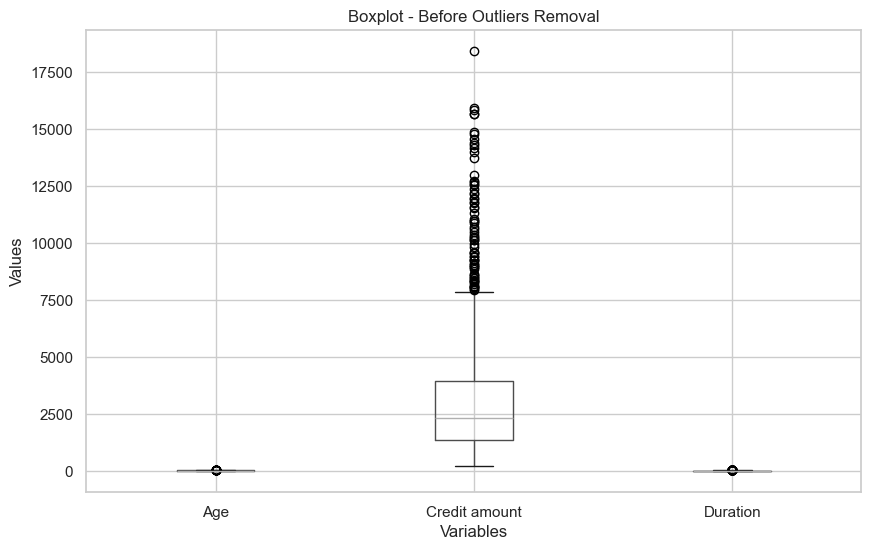

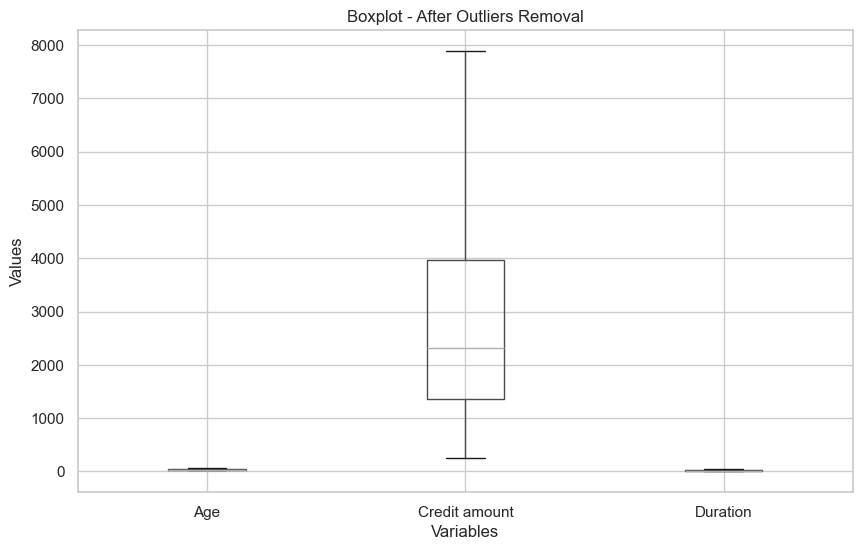

In [366]:
import matplotlib.pyplot as plt

# Boxplot before removing outliers
plt.figure(figsize=(10, 6))
df.boxplot(column=['Age', 'Credit amount', 'Duration'])
plt.title('Boxplot - Before Outliers Removal')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
new_df.boxplot(column=['Age', 'Credit amount', 'Duration'])
plt.title('Boxplot - After Outliers Removal')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()



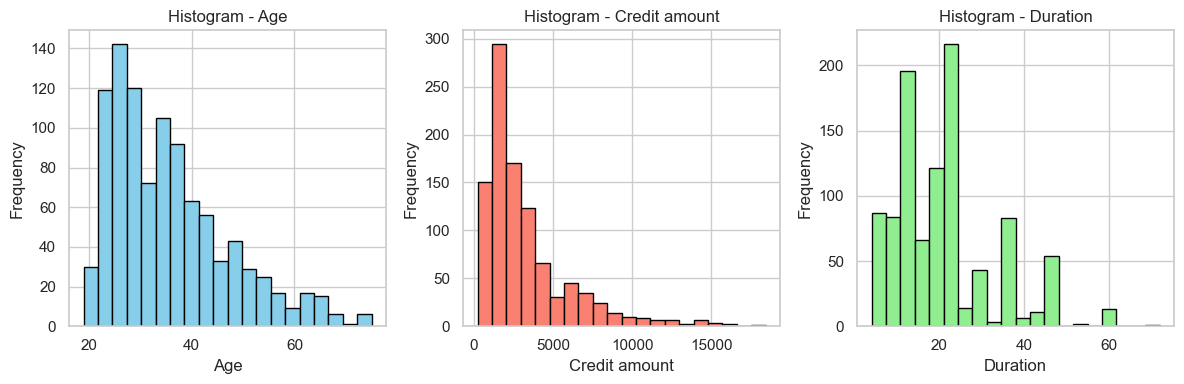

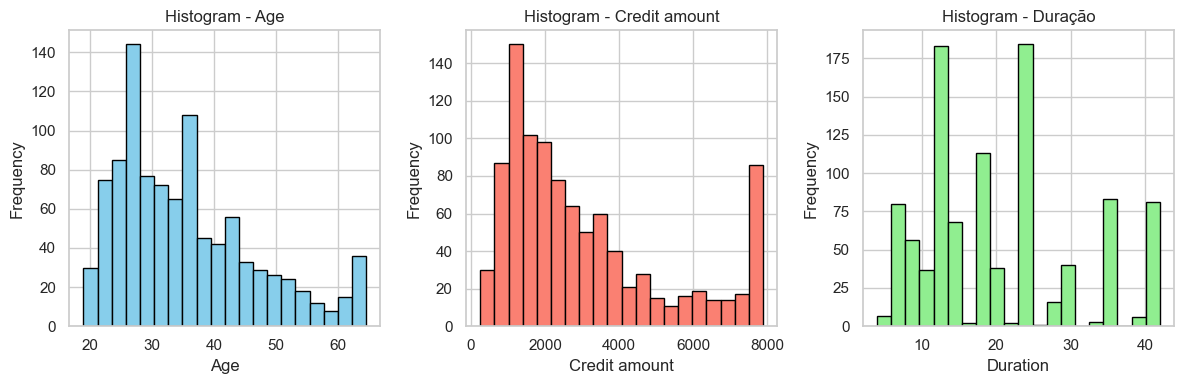

In [371]:
# Histograms before removing outliers
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram - Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['Credit amount'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram - Credit amount')
plt.xlabel('Credit amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['Duration'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram - Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Histogramas depois da remoção dos outliers
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(new_df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram - Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(new_df['Credit amount'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram - Credit amount')
plt.xlabel('Credit amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(new_df['Duration'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram - Duração')
plt.xlabel('Duration')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




# 3.3. Label Coding and One-Hot Coding

Transforming categorical variables into dummy variables. This is done to allow machine learning models to work with these categorical variables, which originally could not be directly used in many algorithms.

In [372]:
# Convert categorical columns to dummy variables
categorical_columns = ['Purpose', 'Sex', 'Housing', 'Saving accounts', 'Risk', 'Checking account', 'Age_cat']
for column in categorical_columns:
    if column in new_df.columns:
        dummies = pd.get_dummies(new_df[column], drop_first=True, prefix=column)
        new_df = pd.concat([new_df, dummies], axis=1)
        new_df.drop(column, axis=1, inplace=True)

new_df.head()

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Saving accounts_unknown,Risk_good,Checking account_moderate,Checking account_rich,Checking account_unknown,Age_cat_adult,Age_cat_senior
0,64.5,2.0,1169.0,6.0,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,False,True
1,22.0,2.0,5951.0,42.0,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,49.0,2.0,2096.0,12.0,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,True,False
3,45.0,2.0,7882.0,42.0,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
4,53.0,2.0,4870.0,24.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


# 3.4. Standardization

In [373]:
print(new_df.columns)

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Sex_male', 'Housing_own', 'Housing_rent',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Saving accounts_unknown', 'Risk_good',
       'Checking account_moderate', 'Checking account_rich',
       'Checking account_unknown', 'Age_cat_adult', 'Age_cat_senior'],
      dtype='object')


    Age  Credit amount  Duration
0  64.5         1169.0       6.0
1  22.0         5951.0      42.0
2  49.0         2096.0      12.0
3  45.0         7882.0      42.0
4  53.0         4870.0      24.0
                count       mean          std    min      5%    10%     25%  \
Age            1000.0    35.4535    11.106324   19.0   22.00   23.0    27.0   
Credit amount  1000.0  3051.1010  2187.140403  250.0  708.95  932.0  1365.5   
Duration       1000.0    20.3070    10.615151    4.0    6.00    9.0    12.0   

                  50%      75%     80%     90%       95%       99%       max  
Age              33.0    42.00    45.0    52.0    60.000    64.500    64.500  
Credit amount  2319.5  3972.25  4720.0  7179.4  7882.375  7882.375  7882.375  
Duration         18.0    24.00    30.0    36.0    42.000    42.000    42.000  


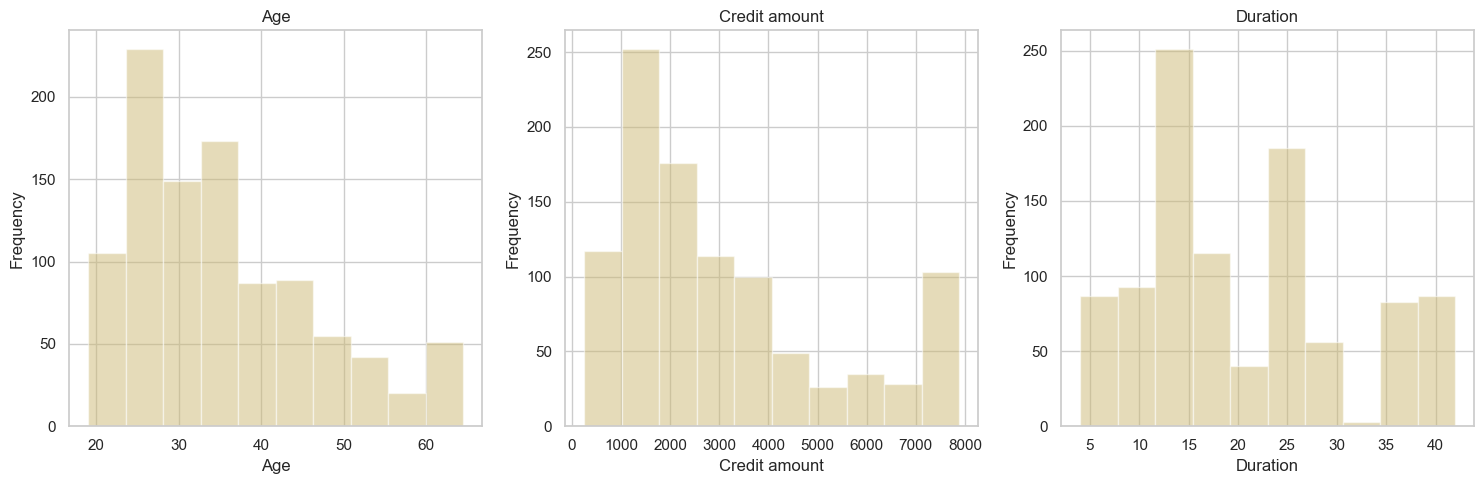

     Age  Credit amount  Duration
0  2.100         -0.441      -1.0
1 -0.733          1.393       2.0
2  1.067         -0.086      -0.5
3  0.800          2.134       2.0
4  1.333          0.978       0.5
                count      mean       std    min      25%  50%    75%    max
Age            1000.0  0.163565  0.740443 -0.933 -0.40000  0.0  0.600  2.100
Credit amount  1000.0  0.280644  0.839037 -0.794 -0.36625  0.0  0.634  2.134
Duration       1000.0  0.192243  0.884603 -1.167 -0.50000  0.0  0.500  2.000


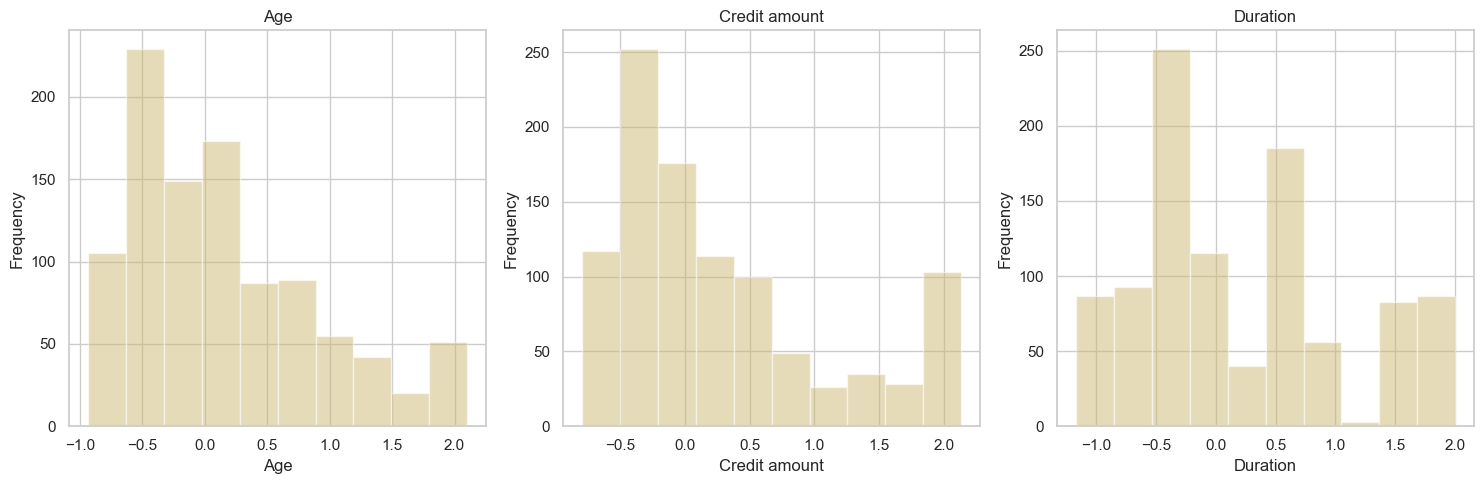

In [376]:
import matplotlib.pyplot as plt
import numpy as np

# Select columns that need scaling
like_num = [col for col in new_df.columns if new_df[col].dtypes != 'O' and len(new_df[col].value_counts()) < 20]

cols_need_scale = [col for col in new_df.columns if col not in ["Id", "Risk"] and col not in like_num]

# Display the selected columns
print(new_df[cols_need_scale].head())
print(new_df[cols_need_scale].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T)

def hist_for_nums(df, numeric_cols):
    num_plots = len(numeric_cols)
    num_cols_per_row = 3  # Number of columns per row
    num_rows = num_plots // num_cols_per_row + (num_plots % num_cols_per_row > 0)  # Calculate the number of rows needed
    fig, axs = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5*num_rows))  # Create a figure with the appropriate number of subplots
    axs = np.atleast_2d(axs)  # Ensure axs is a 2D array
    
    for i, col in enumerate(numeric_cols):
        row = i // num_cols_per_row
        col_idx = i % num_cols_per_row
        df[numeric_cols[i]].plot.hist(alpha=0.5, color='y', ax=axs[row, col_idx])  # Access the subplot correctly
        axs[row, col_idx].set_xlabel(numeric_cols[i])  # Use column name as label
        axs[row, col_idx].set_title(numeric_cols[i])  # Use column name as title

    plt.tight_layout()  # Adjust layout to avoid overlapping graphics
    plt.show()

hist_for_nums(new_df, cols_need_scale)

def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

for col in cols_need_scale:
    new_df[col] = robust_scaler(new_df[col])

print(new_df[cols_need_scale].head())
print(new_df[cols_need_scale].describe().T)
hist_for_nums(new_df, cols_need_scale)


In [377]:
new_df.describe()



,Age,Job,Credit amount,Duration
count,1000.000000,1000.0,1000.000000,1000.000000
mean,0.163565,2.0,0.280644,0.192243
std,0.740443,0.0,0.839037,0.884603
min,-0.933000,2.0,-0.794000,-1.167000
25%,-0.400000,2.0,-0.366250,-0.500000
50%,0.000000,2.0,0.000000,0.000000
75%,0.600000,2.0,0.634000,0.500000
max,2.100000,2.0,2.134000,2.000000


Analyzing the results of the statistical description of the columns after standardization, we can observe that the column means are very close to zero (0) and the standard deviations are close to one (1). This suggests that the columns were standardized correctly. Additionally, the minimum and maximum values of the columns are also within a reasonable range, which indicates that the standardization did not introduce any significant problems into the data.

# 3.5. Correlation and Heatmap Analysis

Observing correlations between target and independent variables

<Axes: >

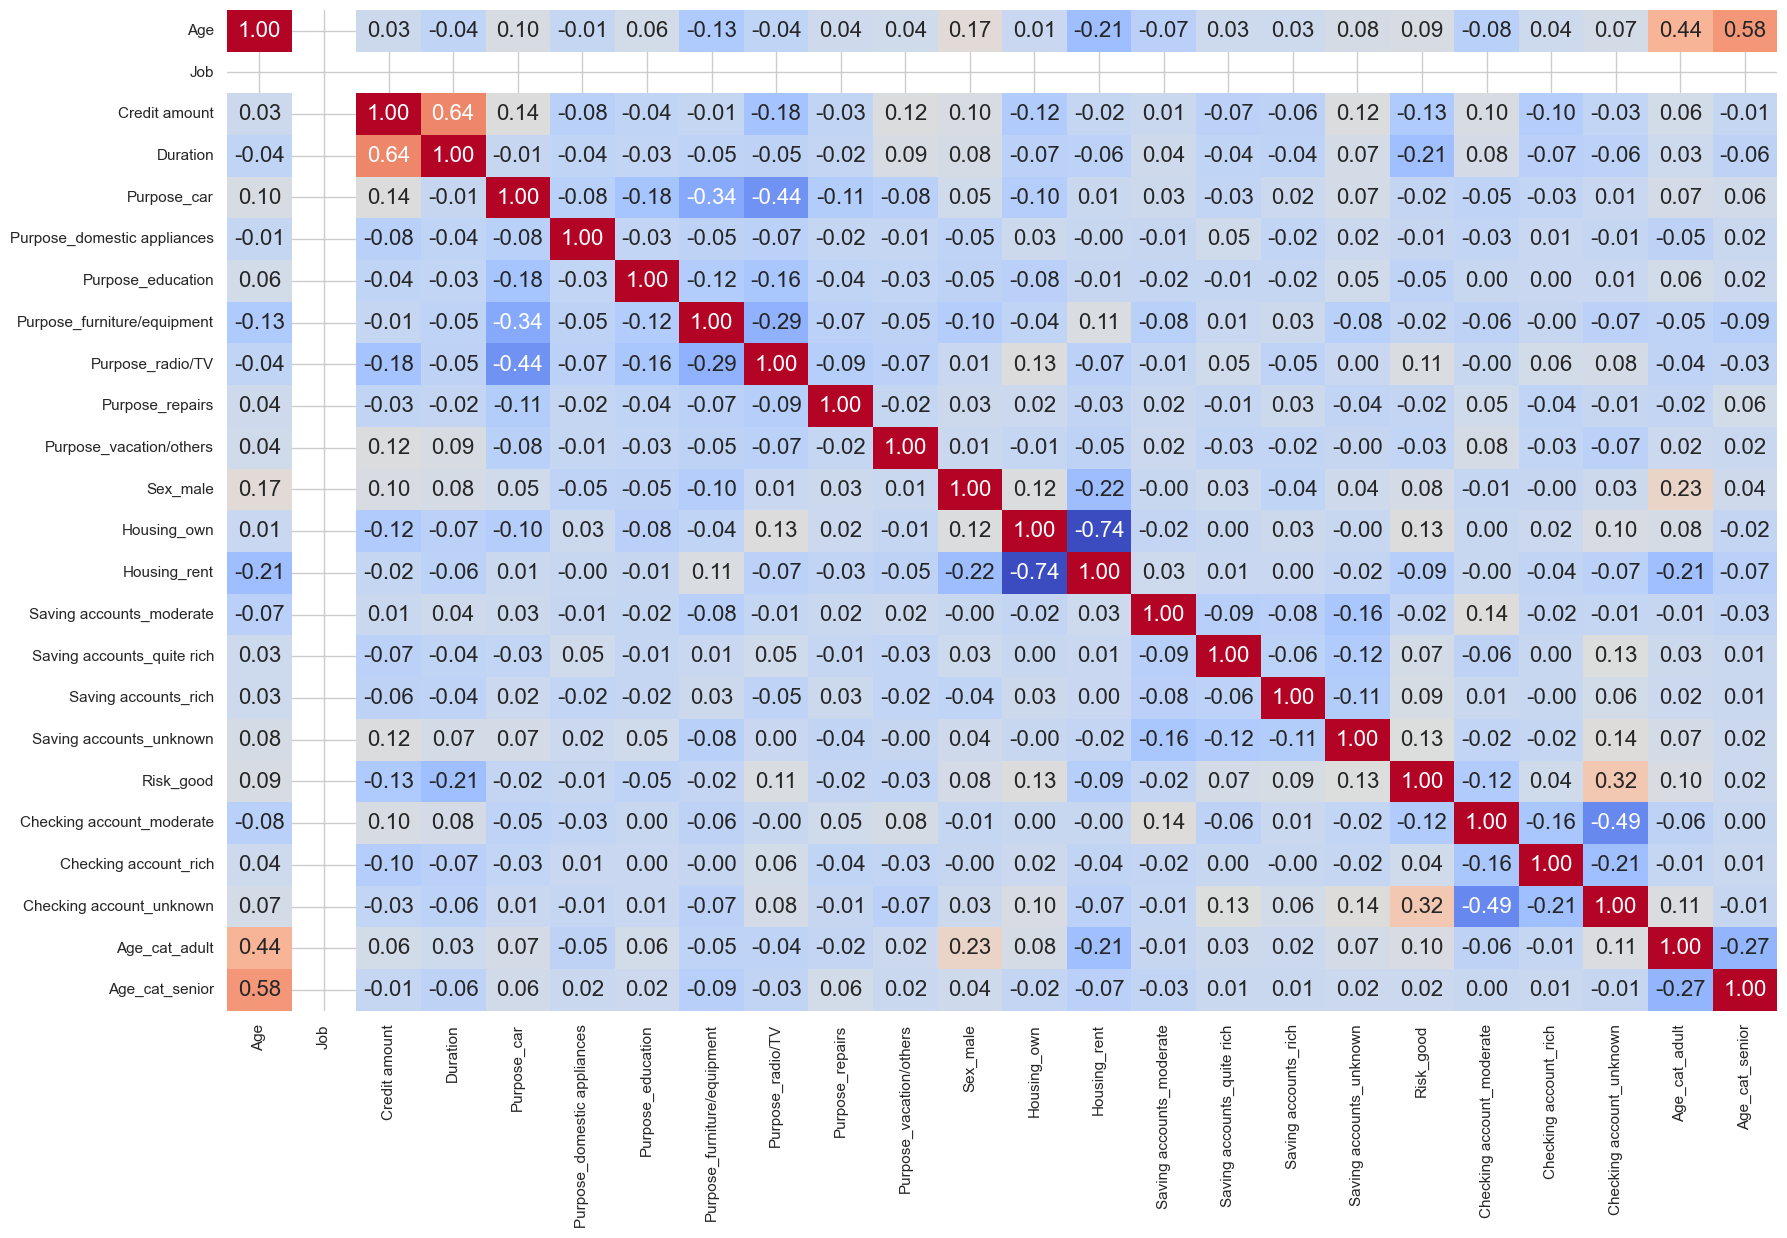

In [378]:
plt.figure(figsize=(20,13))
sns.heatmap(new_df.corr(),
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            annot_kws={'size':16},
            cbar=False)

# 4. Implementation of Machine Learning Algorithms

In [379]:
!pip install xgboost lightgbm


In [380]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [381]:
# Rename columns to avoid special characters
new_df.columns = [c.replace(' ', '_').replace('.', '_').replace(',', '_').replace(';', '_') for c in new_df.columns]
# Create variables X and y
X = new_df.drop('Risk_good', axis=1).values
y = new_df['Risk_good'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check the size of datasets
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

# Set the seed for reproducibility
seed = 7

# Prepare the list of models
models = []
models.append(('LGR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGBM', XGBClassifier()))

# Rate each model in the list
results = []
names = []
scoring = 'recall'

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



Training set size: 750
Test set size: 250
LGR: 0.883371 (0.067871)
LDA: 0.870533 (0.070737)
KNN: 0.838311 (0.075017)
CART: 0.766250 (0.084334)
NB: 0.745714 (0.080858)
RF: 0.870740 (0.061147)
SVM: 0.955443 (0.039990)
XGBM: 0.844139 (0.056622)


The dataset was divided into 750 samples for training and 250 samples for testing. The training set is used to tune the models, while the testing set is used to evaluate the models' performance.

Interpretation of Results

Best Performance:

The SVM (Support Vector Machine) performed best in terms of average recall (95.54.49%) and stability (3.99% standard deviation). This means that SVM is excellent at correctly identifying positive (or "Risk_good") samples.

Strong Alternative Models:

Logistic Regression (88%) and Linear Discriminant Analysis (87%) also performed well with moderate variation.
Random Forest (87.07%) also performed well, with high recall and acceptable variance.

Lower Performing Models:

Decision Tree (76.62%) and Gaussian Naive Bayes (74,57%) showed the lowest performance, indicating that they are less effective in correctly identifying positive samples.

XGBoost (84%) performed reasonably well, but inferior to the models mentioned above.

Conclusion

SVM is the best model due to its high recall and low variance.

Logistic Regression and LDA models: These are good alternatives with good performance and can be considered.

Underperforming Models: Decision Tree and Naive Bayes underperformed and may not be ideal for this dataset.

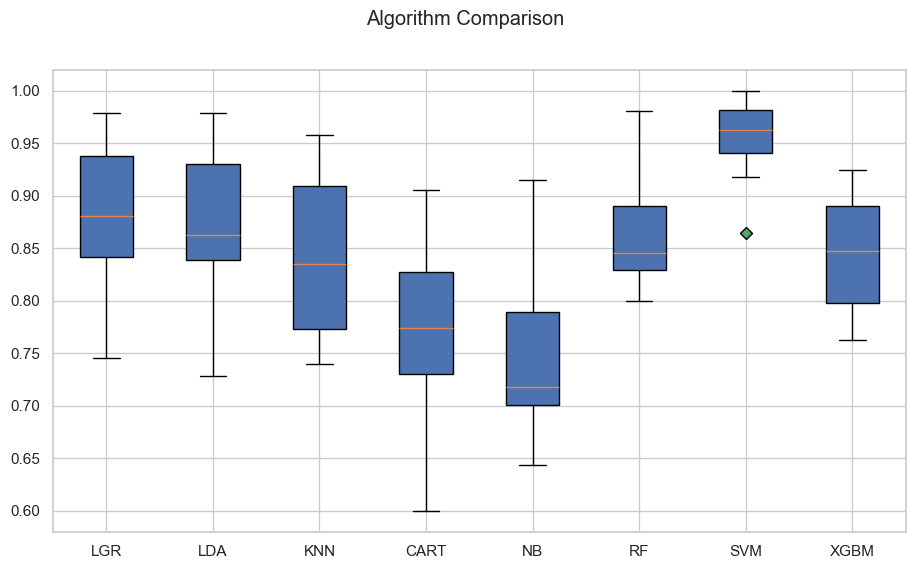

In [382]:
# Comparison of algorithms with boxplot
fig = plt.figure(figsize=(11, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(results, flierprops=green_diamond, patch_artist=True)
ax.set_xticklabels(names)
plt.show()


In [384]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, fbeta_score

# Define features and FeatureUnion
features = []
features.append(('variance_threshold', VarianceThreshold()))  # Remover features constantes
features.append(('PCA', PCA(n_components=2)))
features.append(('Select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# Create the pipeline
estimators = []
estimators.append(('Feature_union', feature_union))
estimators.append(('Logistic_regression', LogisticRegression()))
model = Pipeline(estimators)

# Evaluate the pipeline
seed = 7
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Cross-validation mean score:", results.mean())

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model on the test set
print("Test predict accuracy score: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Weighted harmonic mean of precision according to Test prediction:", fbeta_score(y_test, y_pred, beta=2))


C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [1] are constant.

C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide

C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [1] are constant.

C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide

C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [1] are constant.

C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide

C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Featu

Cross-validation mean score: 0.7333333333333334
Test predict accuracy score: 0.74
Confusion Matrix:
 [[ 27  45]
 [ 20 158]]
Weighted harmonic mean of precision according to Test prediction: 0.8633879781420765


C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [1] are constant.

C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide



# PS: Trying to compare the results of both models to be able to help decide which one is more suitable for credit risk analysis based on metrics such as recall, precision and interpretability.

In [385]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd


# Rename columns to avoid special characters
new_df.columns = [c.replace(' ', '_').replace('.', '_').replace(',', '_').replace(';', '_') for c in new_df.columns]

# Create variables X and y
X = new_df.drop('Risk_good', axis=1).values
y = new_df['Risk_good'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Logistic Regression Assessment
model_lgr = LogisticRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
cv_results_lgr = cross_val_score(model_lgr, X_train, y_train, cv=kfold, scoring='recall')
print(f"Logistic Regression Recall: {cv_results_lgr.mean()} ({cv_results_lgr.std()})")

# Evaluation of Linear Discriminant Analysis
model_lda = LinearDiscriminantAnalysis()
cv_results_lda = cross_val_score(model_lda, X_train, y_train, cv=kfold, scoring='recall')
print(f"Linear Discriminant Analysis Recall: {cv_results_lda.mean()} ({cv_results_lda.std()})")

# Train the chosen model
model_lgr.fit(X_train, y_train)
y_pred_lgr = model_lgr.predict(X_test)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_lgr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lgr))

model_lda.fit(X_train, y_train)
y_pred_lda = model_lda.predict(X_test)
print("Linear Discriminant Analysis Test Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Linear Discriminant Analysis Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("Linear Discriminant Analysis Classification Report:\n", classification_report(y_test, y_pred_lda))


Logistic Regression Recall: 0.8833712881168594 (0.06787119082701586)
Linear Discriminant Analysis Recall: 0.870532846403058 (0.07073691075450492)
Logistic Regression Test Accuracy: 0.74
Logistic Regression Confusion Matrix:
 [[ 27  45]
 [ 20 158]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.57      0.38      0.45        72
        True       0.78      0.89      0.83       178

    accuracy                           0.74       250
   macro avg       0.68      0.63      0.64       250
weighted avg       0.72      0.74      0.72       250

Linear Discriminant Analysis Test Accuracy: 0.736
Linear Discriminant Analysis Confusion Matrix:
 [[ 28  44]
 [ 22 156]]
Linear Discriminant Analysis Classification Report:
               precision    recall  f1-score   support

       False       0.56      0.39      0.46        72
        True       0.78      0.88      0.83       178

    accuracy                           0.74